In [26]:
# import MNIST dataset

import pandas as pd
mnist_df = pd.read_csv('mnist_train.csv')
mnist_labels = mnist_df['label']
mnist_pixels = mnist_df.drop('label', axis = 1)
#mnist_labels = mnist_labels.head(15000)
#mnist_pixels = mnist_pixels.head(15000)

In [27]:
# standardize mnist dataset

from sklearn.preprocessing import StandardScaler
mnist_pixels_std_df = StandardScaler().fit_transform(mnist_pixels)
print(mnist_pixels_std_df.shape)

# Clip 1000 datapoints

mnist_pixels_tsne = mnist_pixels_std_df#mnist_pixels_std_df[0:1000,:]
mnist_labels_tsne = mnist_labels#mnist_labels[:1000]
print("MNIST labels : ", mnist_labels_tsne.shape)
print("MNIST features : ", mnist_pixels_tsne.shape)

(42000, 784)
MNIST labels :  (42000,)
MNIST features :  (42000, 784)


In [28]:
# t-SNE
from sklearn.manifold import TSNE
import timeit
# code you want to evaluate
# D-dash = 2
# default perplexity = 30
# default learning rate = 200
# default no. of iteration for optimization = 1000

start_time = timeit.default_timer()

model = TSNE(n_components = 2, random_state = 0)
tsne_model = model.fit_transform(mnist_pixels_tsne).T

elapsed = timeit.default_timer() - start_time



Elapsed time for t-SNE visualization : 3720.5357107 seconds


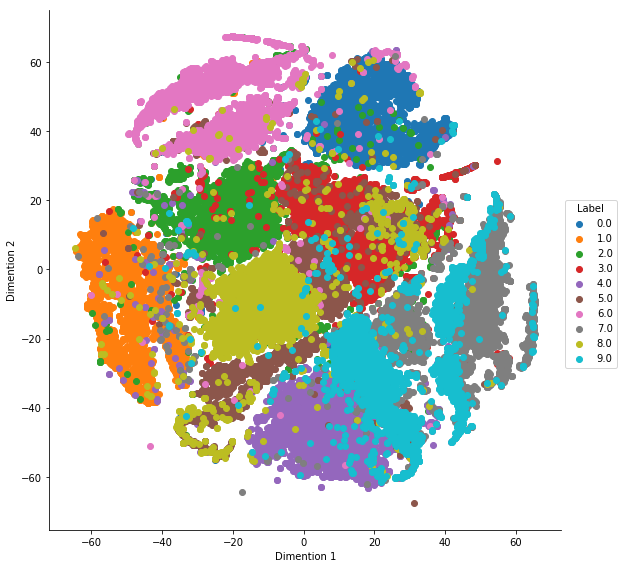

In [30]:
# visualizing t-SNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tsne_data = np.vstack((tsne_model, mnist_labels_tsne)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=('Dimention 1', 'Dimention 2', 'Label'))
sns.FacetGrid(tsne_df, size = 8, hue = 'Label').map(plt.scatter, 'Dimention 1', 'Dimention 2').add_legend()

print('\n\nElapsed time for t-SNE visualization :', elapsed, 'seconds')